<a href="https://colab.research.google.com/github/sathishvijay-git/amil/blob/master/CNN_Project_Sathish_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import the libraries, load dataset, print shape of data, visualize the images in train and test set**

In [2]:
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
trnimages = np.load("/content/drive/MyDrive/Colab Notebooks/CNN Project/covid-19-dataset/trainimage.npy") 
trnlabels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CNN Project/covid-19-dataset/trainLabels.csv")


In [6]:
testimages = np.load("/content/drive/MyDrive/Colab Notebooks/CNN Project/covid-19-dataset/testimage.npy") 
testlabels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CNN Project/covid-19-dataset/testLabels.csv")


In [7]:
print(trnimages.shape)
print(trnlabels.shape)
print(testimages.shape)
print(testlabels.shape)

(251, 128, 128, 3)
(251, 1)
(66, 128, 128, 3)
(66, 1)


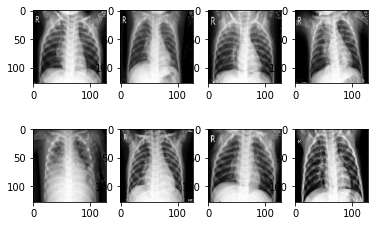

In [8]:
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(trnimages[i])

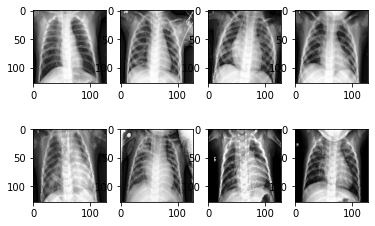

In [9]:
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(testimages[i])

### **Explore the Data**

In [10]:
# Value counts
trnlabels.value_counts()

Label          
Covid              111
Viral Pneumonia     70
Normal              70
dtype: int64

In [11]:
testlabels.value_counts()

Label          
Covid              26
Viral Pneumonia    20
Normal             20
dtype: int64

In [12]:
trnlabels['Label'].unique()

array(['Viral Pneumonia', 'Covid', 'Normal'], dtype=object)

### **Data Pre-processing**

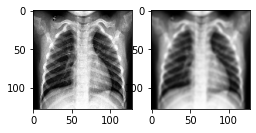

In [13]:
#Gaussian Blurring of Training Images
trnblured_images = []
for img in trnimages:
  blurImg = cv2.GaussianBlur(img,(5,5),0)
  trnblured_images.append(blurImg)

plt.subplot(1,3,1); plt.imshow(img)
plt.subplot(1,3,2); plt.imshow(blurImg)



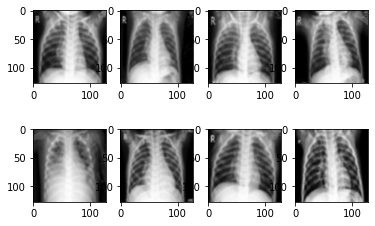

In [14]:
#Visualize Training data after performing the Gaussian blurring
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(trnblured_images[i])

In [15]:
#Normalization of Training data
trnblured_images = np.asarray(trnblured_images)
trnblured_images = trnblured_images / 255

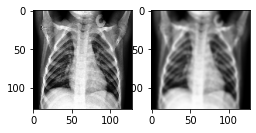

In [16]:
#Gaussian Blurring of Test Images
tstblured_images = []
for img in testimages:
  blurImg = cv2.GaussianBlur(img,(5,5),0)
  tstblured_images.append(blurImg)

plt.subplot(1,3,1); plt.imshow(img)
plt.subplot(1,3,2); plt.imshow(blurImg)

In [17]:
tstblured_images = np.asarray(tstblured_images)
tstblured_images = tstblured_images / 255

### **Make data compatible**

In [18]:
#Reshape data into shapes compatible with Keras models
X_train = trnblured_images.reshape(trnblured_images.shape[0],128,128,3) #Training Data Set
X_test = tstblured_images.reshape(tstblured_images.shape[0],128,128,3) #Test Data Set

In [19]:
#Convert Training labels to one hot vectors
from sklearn.preprocessing import LabelBinarizer
encode = LabelBinarizer();
y_train= encode.fit_transform(trnlabels)

In [20]:
#Convert Test labels to one hot vectors
y_test= encode.fit_transform(testlabels)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(251, 128, 128, 3)
(251, 3)
(66, 128, 128, 3)
(66, 3)


### **Building CNN**

In [22]:
#Define layers

model = models.Sequential()
#First convolution
model.add(layers.Conv2D(64,(3,3),padding='same',activation="relu",input_shape=(128,128,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))

# Second convolution
model.add(layers.Conv2D(128,(3,3),padding='same',activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.3))

# Third convolution
model.add(layers.Conv2D(128,(3,3),padding='same',activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.4))

# Fourth convolution
model.add(layers.Conv2D(128,(3,3),padding='same',activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation="relu"))

model.add(layers.Dense(3,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0

In [23]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam')

model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])


In [24]:
history = model.fit(X_train,y_train,epochs=25,batch_size=None)

Epoch 1/25
8/8 [==============================] - 21s 3s/step - loss: 8.2571 - accuracy: 0.5060
Epoch 2/25
8/8 [==============================] - 21s 3s/step - loss: 0.6572 - accuracy: 0.7689
Epoch 3/25
8/8 [==============================] - 21s 3s/step - loss: 0.3323 - accuracy: 0.8526
Epoch 4/25
8/8 [==============================] - 21s 3s/step - loss: 0.2110 - accuracy: 0.9402
Epoch 5/25
8/8 [==============================] - 21s 3s/step - loss: 0.1536 - accuracy: 0.9402
Epoch 6/25
8/8 [==============================] - 21s 3s/step - loss: 0.1636 - accuracy: 0.9482
Epoch 7/25
8/8 [==============================] - 21s 3s/step - loss: 0.1247 - accuracy: 0.9562
Epoch 8/25
8/8 [==============================] - 21s 3s/step - loss: 0.0865 - accuracy: 0.9721
Epoch 9/25
8/8 [==============================] - 21s 3s/step - loss: 0.0673 - accuracy: 0.9761
Epoch 10/25
8/8 [==============================] - 21s 3s/step - loss: 0.0652 - accuracy: 0.9681
Epoch 11/25
8/8 [======================

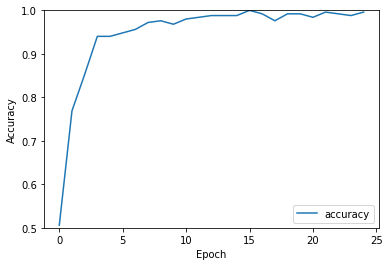

In [25]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

In [26]:
#Evaluvate the model
score = model.evaluate(X_test,y_test,verbose=0,batch_size=None)
print('Test Loss',score[0])
print('Test Accuracy',score[1])

#Test Accuracy is Less, the Train data is overfit

Test Loss 32.303043365478516
Test Accuracy 0.39393940567970276


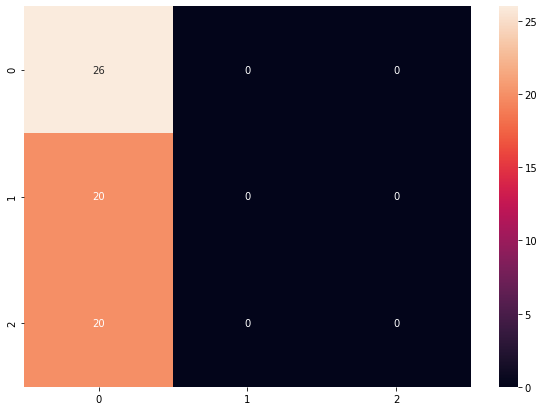

In [27]:
Y_pred = model.predict(X_test)
result = np.argmax(Y_pred,axis=1)

Y_true = np.argmax(y_test,axis=1)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_true,result)

df_cm = pd.DataFrame(conf_mat, index= [i for i in range(0,3)],columns = [i for i in range(0,3)])
plt.figure(figsize= (10,7))
sns.heatmap(df_cm,annot=True,fmt='g')

2
Predicted Label 0
True Label 2


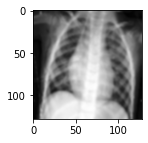

3
Predicted Label 0
True Label 2


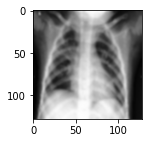

33
Predicted Label 0
True Label 0


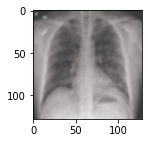

36
Predicted Label 0
True Label 0


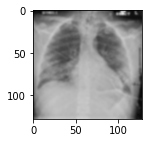

59
Predicted Label 0
True Label 1


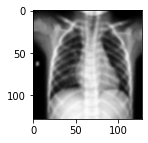

In [32]:
import numpy as np
list=[2,3,33,36,59]
for i in list:
  plt.figure(figsize=(2,2))
  plt.imshow(X_test[i])
  print('Predicted Label',np.argmax(model.predict(X_test[i].reshape(1,128,128,3))))
  print('True Label',np.argmax(y_test[i]))
  plt.show()